In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import logit
from scipy.stats import norm

import tensorflow as tf
from keras import layers, models, datasets

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchinfo import summary
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import train_test_split, LeaveOneOut, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression

import sys

Inspired by the concept of minimizing the length of a string as a form of regularization. 

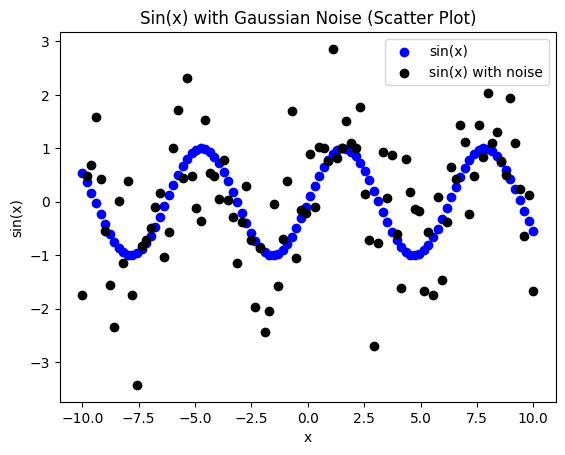

In [124]:
x = torch.linspace(-10, 10, 100)

y = torch.sin(x)

noise = torch.normal(mean=0, std=1.0, size=y.size())
y_noisy = y + noise

plt.scatter(x.numpy(), y.numpy(), label='sin(x)', color='blue')
plt.scatter(x.numpy(), y_noisy.numpy(), label='sin(x) with noise', color='black')
plt.legend()
plt.title("Sin(x) with Gaussian Noise (Scatter Plot)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

100,000 iterations because why not

Plot turned out quite nicely

In [146]:
learning_rate = 0.00001
smoothness_weight = 2.0
optimized_tensor = torch.zeros_like(y_noisy, requires_grad=True)
num_iterations = 100000

loss_history = []

In [147]:
for i in range(num_iterations):
    data_loss = torch.sum((optimized_tensor - y_noisy) ** 2)
    
    prev_diff = torch.sqrt((x[:-1] - x[1:]) ** 2 + (optimized_tensor[:-1] - optimized_tensor[1:]) ** 2)
    next_diff = torch.sqrt((x[1:] - x[:-1]) ** 2 + (optimized_tensor[1:] - optimized_tensor[:-1]) ** 2)
    smoothness_loss = torch.sum(prev_diff) + torch.sum(next_diff)

    total_loss = data_loss + smoothness_weight * smoothness_loss
    total_loss.backward()
    
    with torch.no_grad():
        optimized_tensor -= learning_rate * optimized_tensor.grad
    
    optimized_tensor.grad.zero_()
    
    loss_history.append(total_loss.item())

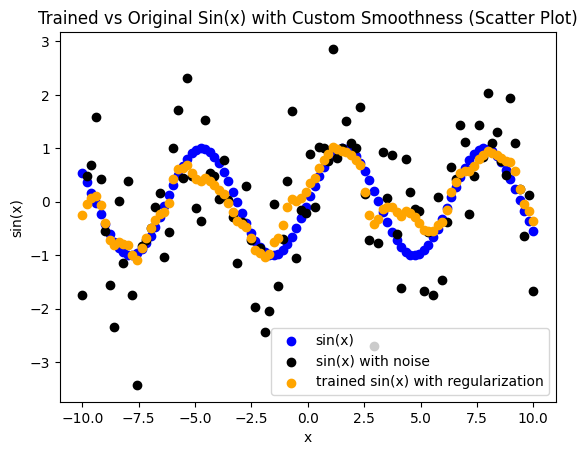

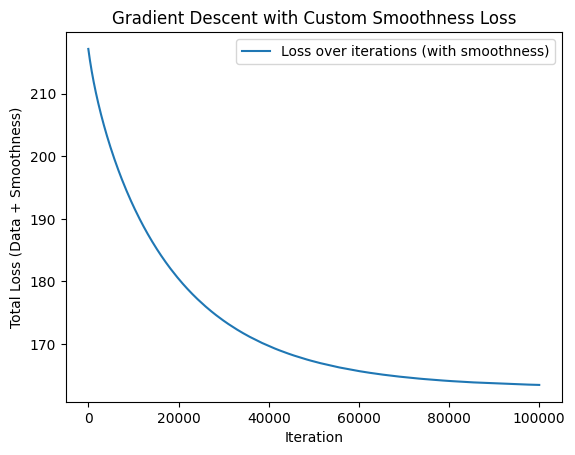

In [148]:
plt.scatter(x.numpy(), y.numpy(), label='sin(x)', color='blue')
plt.scatter(x.numpy(), y_noisy.numpy(), label='sin(x) with noise', color='black')
plt.scatter(x.numpy(), optimized_tensor.detach().numpy(), label='trained sin(x) with regularization', color='orange')
plt.legend()
plt.title("Trained vs Original Sin(x) with Custom Smoothness (Scatter Plot)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

plt.plot(loss_history, label="Loss over iterations (with smoothness)")
plt.title("Gradient Descent with Custom Smoothness Loss")
plt.xlabel("Iteration")
plt.ylabel("Total Loss (Data + Smoothness)")
plt.legend()
plt.show()

In [149]:
squared_loss_y_noisy = torch.sum((y_noisy - y) ** 2)
squared_loss_optimized = torch.sum((optimized_tensor.detach() - y) ** 2)

squared_loss_y_noisy.item(), squared_loss_optimized.item()

(86.73045349121094, 10.427934646606445)